# Voting Classifier

In [1]:
import pandas as pd
import numpy as np

import functions_classifier as func

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

## Constants

In [2]:
PATH_PROCESSED_TRAIN_CSV = "../data/processed_train.csv"

## Data Collection

In [3]:
train_df = pd.read_csv(PATH_PROCESSED_TRAIN_CSV)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilyName,Kinship,Deck,Alone,AgeGroup
0,0,3,1,22.0,1,0,523,7.25,2,2,73,1,8,0,0
1,1,1,0,38.0,1,0,596,71.28,0,3,136,1,2,0,0
2,1,3,0,26.0,0,0,669,7.92,2,1,251,0,8,1,0
3,1,1,0,35.0,1,0,49,26.55,2,3,198,1,2,0,0
4,0,3,1,35.0,0,0,472,8.05,2,2,11,0,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,13.00,2,4,406,0,8,1,0
887,1,1,0,19.0,0,0,14,30.00,2,1,221,0,1,1,0
888,0,3,0,29.0,1,2,675,11.72,2,1,293,3,8,0,0
889,1,1,1,26.0,0,0,8,30.00,0,2,52,0,2,1,0


## Feature Selection

_Legend:_

X: Feature Variables (or Independent Variables)

y: Target Variables (or dependent Variables)

In [4]:
X = train_df.drop(["Survived"], axis=1)
y = train_df["Survived"]

X = scale(X)

### Split dataset into train and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
X_train.shape, y_train.shape

((668, 14), (668,))

In [7]:
X_test.shape, y_test.shape

((223, 14), (223,))

## Modeling

### scikit-learn

#### Building, train and predict model

In [8]:
params = {
    'C': 3.0, 
    'penalty': 'l2', 
    'tol': 0.1
}
classifier = LogisticRegression(**params)
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

#### Getting Best Hyperparameter Optimization

*Note: The execution of the code below may take a few minutes or hours.*

*Uncomment and run it when you need to optimize hyperparameters.*

In [9]:
# from sklearn.model_selection import (GridSearchCV)
# import warnings

# warnings.filterwarnings("ignore")

# parameters = {
#     "penalty": ('l1', 'l2', 'elasticnet'),
#     "tol": [1e-1, 1e-2, 1e-3, 1e-4],
#     "C": [0.5, 1., 2., 3., 4.],
    
# }

# gridsearch = GridSearchCV(LogisticRegression(), parameters)
# gridsearch.fit(X_train, y_train)

# print("Tuned Hyperparameters :", gridsearch.best_params_)
# print("Best Score:",gridsearch.best_score_)

Tuned Hyperparameters : {'C': 3.0, 'penalty': 'l2', 'tol': 0.1}  
Best Score: 0.7978341375827628

#### Predict and show model result

In [10]:
func.show_model_result(classifier, X, y, y_test, y_predict)


Computing cross-validated metrics
----------------------------------------------------------------------
Scores: [0.79329609 0.79213483 0.7752809  0.78651685 0.82022472]
Mean = 0.79 / Standard Deviation = 0.01

Confunsion Matrix
----------------------------------------------------------------------
[[115  19]
 [ 23  66]]

Classification Report
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       134
           1       0.78      0.74      0.76        89

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223

----------------------------------------------------------------------
Accuracy: 0.81
Precicion: 0.81
Sensitivity aka Recall: 0.81
F1-Score: 0.81


#### Display Confusion Matrix

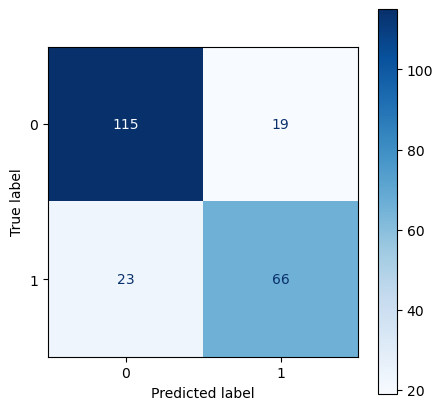

In [11]:
func.display_confusion_matrix(classifier, y_test, y_predict)

### Tensorflow

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Dropout

print(tf.__version__)

2.4.1


In [57]:
input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(15, activation="sigmoid")(input_layer)
dense_layer_2 = Dense(10, activation="sigmoid")(dense_layer_1)
output = Dense(1, activation="softmax")(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['acc'])

In [58]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 14)]              0         
_________________________________________________________________
dense_31 (Dense)             (None, 15)                225       
_________________________________________________________________
dense_32 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 11        
Total params: 396
Trainable params: 396
Non-trainable params: 0
_________________________________________________________________


In [59]:
history = model.fit(X_train, y_train, batch_size=8, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
67/67 [==============================] - 1s 9ms/step - loss: 0.7307 - acc: 0.3951 - val_loss: 0.6782 - val_acc: 0.3433
Epoch 2/50
67/67 [==============================] - 1s 8ms/step - loss: 0.6734 - acc: 0.3698 - val_loss: 0.6437 - val_acc: 0.3433
Epoch 3/50
67/67 [==============================] - 0s 6ms/step - loss: 0.6513 - acc: 0.3697 - val_loss: 0.6284 - val_acc: 0.3433
Epoch 4/50
67/67 [==============================] - 0s 6ms/step - loss: 0.6399 - acc: 0.3808 - val_loss: 0.6137 - val_acc: 0.3433
Epoch 5/50
67/67 [==============================] - 0s 5ms/step - loss: 0.6278 - acc: 0.3713 - val_loss: 0.5997 - val_acc: 0.3433
Epoch 6/50
67/67 [==============================] - 0s 5ms/step - loss: 0.6061 - acc: 0.3509 - val_loss: 0.5847 - val_acc: 0.3433
Epoch 7/50
67/67 [==============================] - 0s 6ms/step - loss: 0.5822 - acc: 0.3391 - val_loss: 0.5692 - val_acc: 0.3433
Epoch 8/50
67/67 [==============================] - 0s 6ms/step - loss: 0.5848 - acc: 0.36